<a href="https://colab.research.google.com/github/Ransaka/FaceDetector/blob/master/datastorm%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

In [3]:
train = pd.read_csv('/content/train_cleaned_and_encoded.csv')

In [6]:
validation = pd.read_csv('/content/validation_scaled_cleaned.csv')

In [5]:
test = pd.read_csv('/content/test_cleaned_scaled.csv')

In [7]:
test.shape

(4318, 26)

In [8]:
train.shape

(4318, 26)

In [9]:
validation.shape

(2749, 27)

In [10]:
train.columns

Index(['Unnamed: 0', 'Reservation-id', 'Gender', 'Age', 'Ethnicity',
       'Educational_Level', 'Income', 'Country_region', 'Hotel_Type', 'Adults',
       'Children', 'Babies', 'Meal_Type', 'Visted_Previously',
       'Previous_Cancellations', 'Deposit_type', 'Booking_channel',
       'Required_Car_Parking', 'Use_Promotion', 'Discount_Rate', 'Room_Rate',
       'Expected_checkin_Year', 'Expected_checkin_Month',
       'expected_days_of_checkin', 'booked_before_n_days', 'isWeekend_trip'],
      dtype='object')

In [11]:
validation.columns

Index(['Unnamed: 0', 'Reservation-id', 'Gender', 'Age', 'Ethnicity',
       'Educational_Level', 'Income', 'Country_region', 'Hotel_Type', 'Adults',
       'Children', 'Babies', 'Meal_Type', 'Visted_Previously',
       'Previous_Cancellations', 'Deposit_type', 'Booking_channel',
       'Required_Car_Parking', 'Reservation_Status', 'Use_Promotion',
       'Discount_Rate', 'Room_Rate', 'Expected_checkin_Year',
       'Expected_checkin_Month', 'expected_days_of_checkin',
       'booked_before_n_days', 'isWeekend_trip'],
      dtype='object')

In [ ]:
test.columns

Index(['Unnamed: 0', 'Reservation-id', 'Gender', 'Age', 'Ethnicity',
       'Educational_Level', 'Income', 'Country_region', 'Hotel_Type', 'Adults',
       'Children', 'Babies', 'Meal_Type', 'Visted_Previously',
       'Previous_Cancellations', 'Deposit_type', 'Booking_channel',
       'Required_Car_Parking', 'Use_Promotion', 'Discount_Rate', 'Room_Rate',
       'Expected_checkin_Year', 'Expected_checkin_Month',
       'expected_days_of_checkin', 'booked_before_n_days', 'isWeekend_trip'],
      dtype='object')

In [ ]:
del train['Unnamed: 0']

In [ ]:
del test['Unnamed: 0']

In [ ]:
del validation['Unnamed: 0']

In [ ]:
train.sample(10)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
27448,37360847,M,54,caucasian,Mid-School,>100K,North,Resort,2,2,1,BB,Yes,Yes,No Deposit,Online,Yes,No-Show,No,0,156,2016,8,1,107,0
14374,72694947,M,49,Asian American,High-School,50K -- 100K,West,Airport Hotels,2,2,1,HB,No,No,No Deposit,Online,Yes,Check-In,Yes,40,219,2017,7,1,174,0
2524,50619149,F,47,Asian American,Grad,50K -- 100K,North,Airport Hotels,5,1,0,BB,Yes,Yes,No Deposit,Direct,Yes,Check-In,No,0,137,2015,10,2,104,0
4254,56309079,F,46,Asian American,Mid-School,>100K,East,Airport Hotels,2,2,2,BB,No,No,Refundable,Direct,No,Check-In,Yes,15,140,2016,2,2,42,0
25359,33997981,F,69,Asian American,Grad,>100K,North,Airport Hotels,3,2,0,BB,No,No,Refundable,Online,No,Canceled,Yes,10,224,2016,6,1,77,0
23652,43899279,F,25,African American,Mid-School,25K --50K,West,Resort,2,2,0,FB,No,No,No Deposit,Online,Yes,Check-In,Yes,5,190,2016,4,1,135,1
18968,55824126,M,42,Latino,High-School,25K --50K,East,Airport Hotels,2,2,0,FB,Yes,Yes,No Deposit,Online,Yes,No-Show,No,0,188,2017,1,1,213,0
15659,77837648,M,22,African American,Mid-School,50K -- 100K,West,Resort,3,1,1,FB,No,No,No Deposit,Direct,No,No-Show,Yes,5,231,2015,7,1,103,0
19640,47580126,M,45,caucasian,College,<25K,South,Airport Hotels,1,3,0,BB,No,No,Refundable,Online,Yes,Canceled,Yes,25,183,2015,12,3,180,0
21696,75383463,M,56,Asian American,High-School,25K --50K,East,Resort,3,2,2,HB,No,No,No Deposit,Agent,Yes,Check-In,No,0,236,2016,5,1,145,0


In [ ]:
test.sample(10)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
2830,71707402,F,41,caucasian,Grad,<25K,North,City Hotel,2,2,1,HB,No,No,Refundable,Direct,Yes,Yes,5,166,2017,2,1,71,0
4045,99656767,M,68,caucasian,Mid-School,25K --50K,South,Resort,4,1,1,BB,Yes,No,No Deposit,Agent,No,No,0,207,2017,3,3,145,1
87,84281735,M,54,Latino,Mid-School,50K -- 100K,West,City Hotel,3,2,0,BB,Yes,Yes,No Deposit,Online,Yes,No,0,183,2016,11,1,4,1
3862,81120471,M,30,Latino,College,50K -- 100K,West,Airport Hotels,5,2,0,BB,No,No,No Deposit,Online,Yes,Yes,30,124,2017,3,3,98,0
1793,21551504,M,33,African American,College,25K --50K,West,Airport Hotels,1,2,0,HB,Yes,No,Refundable,Online,Yes,No,0,138,2017,1,1,72,1
30,55378041,F,21,African American,College,<25K,West,City Hotel,3,1,1,HB,No,No,No Deposit,Online,No,Yes,25,196,2016,11,2,144,1
294,61708136,F,42,African American,Mid-School,>100K,South,Resort,5,2,0,BB,Yes,Yes,No Deposit,Direct,Yes,Yes,5,193,2016,11,1,159,1
2141,68580741,F,37,African American,Mid-School,>100K,West,City Hotel,2,2,0,HB,Yes,Yes,No Deposit,Online,No,No,0,232,2017,1,1,206,0
4135,85338934,F,68,caucasian,College,>100K,North,Airport Hotels,3,1,1,HB,No,No,No Deposit,Online,Yes,Yes,10,161,2017,3,1,64,0
128,11357536,F,21,Asian American,Grad,25K --50K,North,Airport Hotels,5,1,1,HB,No,No,No Deposit,Online,No,Yes,30,138,2016,11,1,140,0


In [ ]:
validation.sample(10)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
2745,52215692,F,35,caucasian,College,25K --50K,South,Airport Hotels,3,2,0,FB,No,No,Non-Refundable,Direct,Yes,Canceled,Yes,5,106,2016,12,1,154,1
436,78728613,M,33,Latino,Mid-School,<25K,South,Airport Hotels,2,1,0,HB,Yes,No,No Deposit,Direct,No,Check-In,No,0,112,2016,9,2,154,0
235,18650261,M,67,Latino,College,25K --50K,East,Airport Hotels,3,1,1,FB,Yes,Yes,Non-Refundable,Direct,Yes,No-Show,Yes,20,226,2016,9,1,158,1
958,42555399,M,59,Latino,Mid-School,25K --50K,South,Airport Hotels,1,2,0,HB,No,No,No Deposit,Direct,No,Check-In,Yes,10,131,2016,10,2,17,0
2348,96104273,M,53,caucasian,College,>100K,East,Resort,1,1,0,FB,No,No,Refundable,Direct,Yes,No-Show,Yes,10,131,2016,11,2,195,0
2563,15421508,F,28,caucasian,High-School,<25K,South,Airport Hotels,5,2,0,FB,No,No,Non-Refundable,Online,Yes,Canceled,Yes,10,160,2016,11,3,175,1
1811,41361554,F,26,caucasian,Mid-School,50K -- 100K,East,Resort,4,3,1,FB,Yes,Yes,Non-Refundable,Direct,Yes,Canceled,Yes,25,209,2016,10,1,203,0
1776,63405628,F,39,caucasian,Mid-School,<25K,South,Airport Hotels,4,1,0,FB,No,No,Non-Refundable,Online,No,Canceled,No,0,225,2016,10,2,187,0
507,53063540,F,62,African American,Mid-School,50K -- 100K,North,Resort,1,1,0,BB,No,No,Refundable,Agent,Yes,Canceled,No,0,207,2016,9,4,115,1
1879,70985111,M,56,Asian American,College,>100K,North,Airport Hotels,2,1,0,FB,Yes,No,No Deposit,Agent,Yes,No-Show,Yes,10,160,2016,10,1,97,0


In [ ]:
cat_cols = [x for x in train.columns if train[x].dtype=="O"]

In [ ]:
cat_cols.pop(-2)

'Reservation_Status'

In [ ]:
cat_cols

['Gender',
 'Ethnicity',
 'Educational_Level',
 'Income',
 'Country_region',
 'Hotel_Type',
 'Meal_Type',
 'Visted_Previously',
 'Previous_Cancellations',
 'Deposit_type',
 'Booking_channel',
 'Required_Car_Parking',
 'Use_Promotion']

In [ ]:
meta = {}
for col in cat_cols:
    meta[col] = list(train[col].unique())

In [ ]:
for key in meta.keys():
    cats = meta[key]
    codes = [x for x in range(len(cats))]
    d = {n:code for n,code in zip(cats,codes)}
    test[key] = test[key].map(d)

In [ ]:
for key in meta.keys():
    cats = meta[key]
    codes = [x for x in range(len(cats))]
    d = {n:code for n,code in zip(cats,codes)}
    train[key] = train[key].map(d)

In [ ]:
for key in meta.keys():
    cats = meta[key]
    codes = [x for x in range(len(cats))]
    d = {n:code for n,code in zip(cats,codes)}
    validation[key] = validation[key].map(d)

In [ ]:
test.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
0,62931593,0,52,0,0,3,2,0,3,3,0,2,0,0,0,2,0,0,10,153,2016,11,1,21,1
1,70586099,0,47,0,0,3,1,1,2,1,0,1,0,0,0,0,1,1,0,210,2016,11,1,104,1
2,4230648,0,28,3,0,0,1,0,2,2,0,0,0,0,0,1,1,0,5,117,2017,4,3,20,1
3,25192322,0,65,1,3,3,2,1,1,3,2,1,0,0,0,0,0,0,10,107,2016,11,2,182,1
4,80931528,1,45,2,2,3,2,0,3,1,0,0,0,0,1,1,1,1,0,119,2016,11,2,18,1


In [ ]:
train.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
0,39428300,0,40,0,0,0,0,0,2,2,0,0,0,0,0,0,0,Check-In,0,10,218,2015,7,1,41,0
1,77491756,0,49,0,1,1,1,0,3,3,0,0,0,0,1,0,0,Check-In,1,0,185,2015,7,1,36,0
2,73747291,0,42,1,0,0,1,0,3,3,0,0,0,0,0,0,0,Check-In,1,0,119,2015,7,4,3,0
3,67301739,1,25,2,2,2,2,1,4,3,0,0,0,0,1,1,0,Check-In,0,5,144,2015,7,1,12,0
4,77222321,0,62,0,3,3,1,2,1,1,0,0,0,0,0,2,1,Check-In,0,10,242,2015,7,1,13,1


In [ ]:
validation.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
0,45716350,1,56,1,0,0,3,2,2,2,0,2,0,0,0,1,1,No-Show,0,15,192,2016,8,2,195,0
1,88857401,1,60,0,2,3,3,2,2,2,0,1,1,0,0,0,0,Canceled,1,0,187,2016,8,4,175,0
2,16074440,0,58,3,2,0,0,1,3,1,0,1,0,0,0,2,1,Canceled,0,10,227,2016,9,1,193,0
3,10992124,0,23,0,2,3,1,1,1,2,0,1,1,0,1,2,1,Check-In,0,25,189,2016,8,2,103,0
4,15934351,0,47,3,2,3,2,0,1,1,0,2,1,0,0,0,0,Check-In,0,10,218,2016,8,1,92,0


In [ ]:
test.to_csv('test_cleaned_and_encoded.csv')

{'boxes': [<matplotlib.lines.Line2D at 0x7f0beea97fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0bee900d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0bee843150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0bee83c350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0bee8a9e90>,
  <matplotlib.lines.Line2D at 0x7f0bee900a10>]}

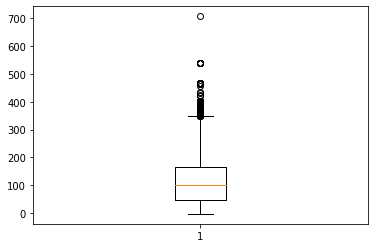

In [ ]:
plt.boxplot(train['booked_before_n_days'])

In [ ]:
train_df = train[train.booked_before_n_days.apply(lambda x:True if x<220 else False)]

{'boxes': [<matplotlib.lines.Line2D at 0x7f0bee771c10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0bee778c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0bee77ccd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0bee77c790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0bee7781d0>,
  <matplotlib.lines.Line2D at 0x7f0bee778710>]}

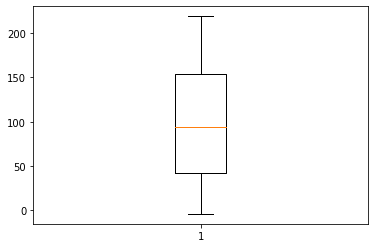

In [ ]:
plt.boxplot(train_df['booked_before_n_days'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f0be9af7810>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0be9afb890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0be9ae8e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0be9b003d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0be9af7dd0>,
  <matplotlib.lines.Line2D at 0x7f0be9afb350>]}

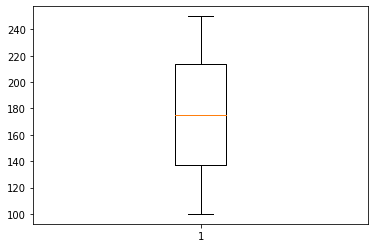

In [ ]:
plt.boxplot(train_df['Room_Rate'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f0be9645210>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0be964e210>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0be9654290>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0be964ed10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0be96c9d90>,
  <matplotlib.lines.Line2D at 0x7f0be9645c90>]}

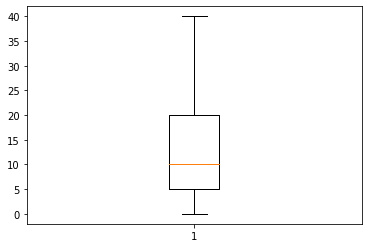

In [ ]:
plt.boxplot(train_df['Discount_Rate'])

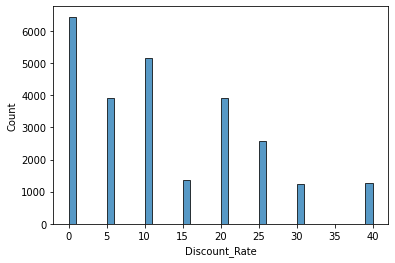

In [ ]:
sns.histplot(train_df['Discount_Rate'])

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit_transform(np.array(train_df.Expected_checkin_Year).reshape(-1,1))

array([[0. ],
       [0. ],
       [0. ],
       ...,
       [0.5],
       [0.5],
       [0.5]])

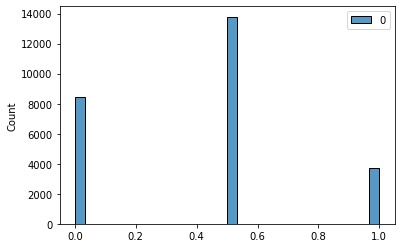

In [ ]:
sns.histplot(scaler.fit_transform(np.array(train_df.Expected_checkin_Year).reshape(-1,1)))

In [ ]:
train_df_bkp = train_df.copy()

In [ ]:
train_df_bkp[train_df_bkp.drop(['Reservation_Status','Reservation-id'],1).columns] = scaler.fit_transform(train_df[train_df.drop(['Reservation_Status','Reservation-id'],1).columns])

In [ ]:
train_df_bkp

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
0,39428300,0.0,0.423077,0.000000,0.000000,0.000000,0.000000,0.0,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Check-In,0.0,0.250,0.786667,0.0,0.545455,0.0,0.201794,0.0
1,77491756,0.0,0.596154,0.000000,0.333333,0.333333,0.333333,0.0,0.50,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,Check-In,1.0,0.000,0.566667,0.0,0.545455,0.0,0.179372,0.0
2,73747291,0.0,0.461538,0.333333,0.000000,0.000000,0.333333,0.0,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Check-In,1.0,0.000,0.126667,0.0,0.545455,1.0,0.031390,0.0
3,67301739,1.0,0.134615,0.666667,0.666667,0.666667,0.666667,0.5,0.75,1.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,Check-In,0.0,0.125,0.293333,0.0,0.545455,0.0,0.071749,0.0
4,77222321,0.0,0.846154,0.000000,1.000000,1.000000,0.333333,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Check-In,0.0,0.250,0.946667,0.0,0.545455,0.0,0.076233,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,0.0,0.596154,0.666667,0.333333,0.000000,1.000000,0.0,0.00,0.5,0.5,1.0,1.0,1.0,0.0,0.0,0.0,Check-In,0.0,0.250,0.000000,0.5,0.636364,0.0,0.183857,0.0
27495,56414525,0.0,0.596154,1.000000,0.666667,1.000000,0.666667,0.5,0.25,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,No-Show,0.0,1.000,0.626667,0.5,0.636364,0.0,0.587444,0.0
27496,52023375,0.0,0.596154,0.000000,1.000000,0.333333,0.666667,0.5,0.25,0.0,0.5,1.0,0.0,0.0,0.0,1.0,0.0,Check-In,0.0,0.125,0.680000,0.5,0.727273,0.0,0.058296,0.0
27497,98041387,1.0,0.903846,0.666667,0.666667,1.000000,0.666667,0.5,0.50,0.5,0.0,0.5,0.0,0.0,0.0,0.0,1.0,Canceled,0.0,0.500,0.380000,0.5,0.636364,0.0,0.457399,0.0


In [ ]:
# train_df['Expected_checkin_Year'] = scaler.fit_transform(np.array(train_df.Expected_checkin_Year).reshape(-1,1))

In [ ]:
train_df_bkp.shape

(25925, 26)

In [ ]:
train_df_bkp.to_csv('train_cleaned_and_encoded.csv')

In [ ]:
validation_bkp = validation.copy()

In [ ]:
validation_bkp[validation_bkp.drop(['Reservation_Status','Reservation-id'],1).columns] = scaler.fit_transform(validation_bkp[validation_bkp.drop(['Reservation_Status','Reservation-id'],1).columns])

In [ ]:
validation_bkp

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
0,45716350,1.0,0.730769,0.333333,0.000000,0.000000,1.000000,1.0,0.25,0.5,0.0,1.0,0.0,0.0,0.0,0.5,1.0,No-Show,0.0,0.375,0.613333,0.0,0.636364,0.333333,0.880531,0.0
1,88857401,1.0,0.807692,0.000000,0.666667,1.000000,1.000000,1.0,0.25,0.5,0.0,0.5,1.0,0.0,0.0,0.0,0.0,Canceled,1.0,0.000,0.580000,0.0,0.636364,1.000000,0.792035,0.0
2,16074440,0.0,0.769231,1.000000,0.666667,0.000000,0.000000,0.5,0.50,0.0,0.0,0.5,0.0,0.0,0.0,1.0,1.0,Canceled,0.0,0.250,0.846667,0.0,0.727273,0.000000,0.871681,0.0
3,10992124,0.0,0.096154,0.000000,0.666667,1.000000,0.333333,0.5,0.00,0.5,0.0,0.5,1.0,0.0,0.5,1.0,1.0,Check-In,0.0,0.625,0.593333,0.0,0.636364,0.333333,0.473451,0.0
4,15934351,0.0,0.557692,1.000000,0.666667,1.000000,0.666667,0.0,0.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Check-In,0.0,0.250,0.786667,0.0,0.636364,0.000000,0.424779,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,32194836,0.0,0.076923,0.333333,0.666667,0.333333,0.666667,1.0,1.00,0.0,0.5,0.0,1.0,0.0,0.5,0.0,1.0,Check-In,0.0,0.250,0.660000,0.0,0.909091,0.666667,0.181416,1.0
2745,52215692,0.0,0.326923,0.333333,0.666667,1.000000,0.666667,0.5,0.50,0.5,0.0,0.5,0.0,0.0,1.0,1.0,0.0,Canceled,0.0,0.125,0.040000,0.0,1.000000,0.000000,0.699115,1.0
2746,31908733,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.25,1.0,0.0,0.5,0.0,0.0,0.5,0.5,1.0,No-Show,0.0,0.500,0.240000,0.0,0.909091,0.333333,0.150442,1.0
2747,41776403,1.0,0.461538,1.000000,0.666667,0.000000,1.000000,0.0,1.00,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Check-In,0.0,0.500,0.840000,0.0,0.909091,0.000000,0.769912,1.0


In [ ]:
validation_bkp.to_csv('validation_scaled_cleaned.csv')

In [ ]:
test_bkp = test.copy()

In [ ]:
test_bkp.shape

(4318, 25)

In [ ]:
validation_bkp.shape

(2749, 26)

In [ ]:
train_df_bkp.shape

(25925, 26)

In [ ]:
test_bkp[test_bkp.drop(['Reservation-id'],1).columns] = scaler.fit_transform(test_bkp[test_bkp.drop(['Reservation-id'],1).columns])

In [ ]:
test_bkp.shape

(4318, 25)

In [ ]:
test_bkp.to_csv('test_cleaned_scaled.csv')

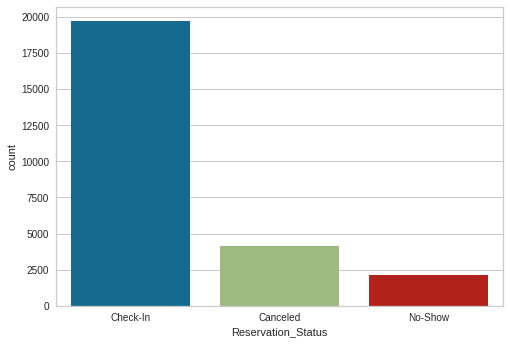

In [41]:
g = sns.countplot(new_train['Reservation_Status'])
# g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

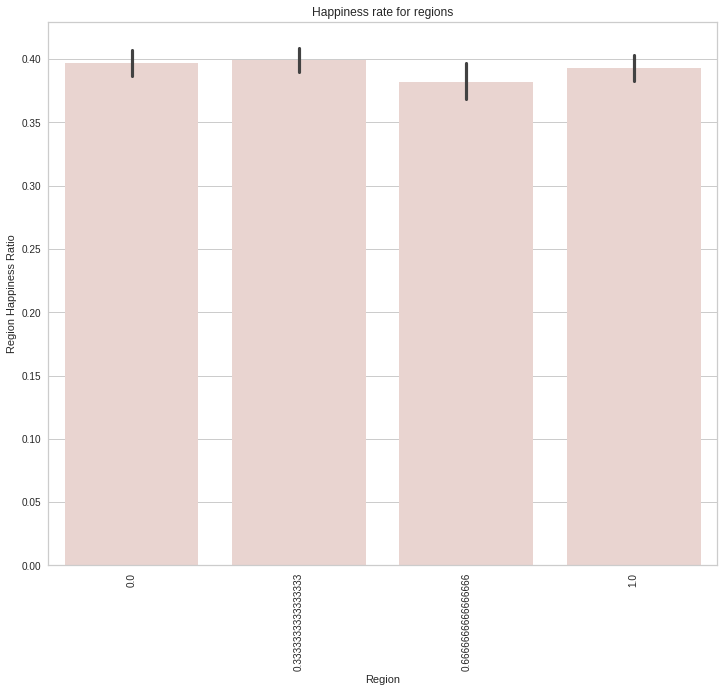

In [42]:
#Visualization
#Create a new figure and make the size (12,10)
plt.figure(figsize=(12,10))
sns.barplot(x=new_train['Income'], y=new_train['Meal_Type'],palette=sns.cubehelix_palette(len(new_train['Income'])))
# Place the region names at a 90-degree angle.
plt.xticks(rotation= 45)
plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Happiness rate for regions')
plt.show()

## Start 

In [4]:
new_train = pd.read_csv('/content/train_cleaned_and_encoded.csv')

In [5]:
del new_train['Unnamed: 0']

In [6]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)

In [7]:
X = new_train.drop(['Reservation_Status','Reservation-id'],1)
y = new_train['Reservation_Status'].map({"Check-In":1,"Canceled":2,"No-Show":3})

In [36]:
pd.DataFrame(x_ros,columns=X.columns)

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
0,0.0,0.423077,0.000000,0.000000,0.000000,0.000000,0.0,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250,0.786667,0.0,0.545455,0.000000,0.201794,0.0
1,0.0,0.596154,0.000000,0.333333,0.333333,0.333333,0.0,0.50,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.000,0.566667,0.0,0.545455,0.000000,0.179372,0.0
2,0.0,0.461538,0.333333,0.000000,0.000000,0.333333,0.0,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000,0.126667,0.0,0.545455,1.000000,0.031390,0.0
3,1.0,0.134615,0.666667,0.666667,0.666667,0.666667,0.5,0.75,1.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.125,0.293333,0.0,0.545455,0.000000,0.071749,0.0
4,0.0,0.846154,0.000000,1.000000,1.000000,0.333333,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.250,0.946667,0.0,0.545455,0.000000,0.076233,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59107,0.0,0.519231,1.000000,0.000000,1.000000,0.666667,1.0,1.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500,0.993333,0.5,0.636364,0.000000,0.242152,1.0
59108,1.0,0.653846,1.000000,1.000000,0.666667,0.333333,1.0,0.00,0.0,1.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,0.250,0.573333,0.0,0.909091,0.000000,0.968610,0.0
59109,0.0,0.192308,0.333333,0.333333,0.333333,0.333333,0.0,0.00,0.5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.750,0.266667,0.5,0.636364,0.333333,0.452915,1.0
59110,0.0,0.365385,0.000000,0.000000,0.000000,0.666667,0.5,0.25,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.500,0.626667,1.0,0.000000,0.000000,0.811659,0.0


In [7]:
list(X.columns)

['Gender',
 'Age',
 'Ethnicity',
 'Educational_Level',
 'Income',
 'Country_region',
 'Hotel_Type',
 'Adults',
 'Children',
 'Babies',
 'Meal_Type',
 'Visted_Previously',
 'Previous_Cancellations',
 'Deposit_type',
 'Booking_channel',
 'Required_Car_Parking',
 'Use_Promotion',
 'Discount_Rate',
 'Room_Rate',
 'Expected_checkin_Year',
 'Expected_checkin_Month',
 'expected_days_of_checkin',
 'booked_before_n_days',
 'isWeekend_trip']

In [ ]:
train.isna().sum()

Reservation-id              0
Gender                      0
Age                         0
Ethnicity                   0
Educational_Level           0
Income                      0
Country_region              0
Hotel_Type                  0
Adults                      0
Children                    0
Babies                      0
Meal_Type                   0
Visted_Previously           0
Previous_Cancellations      0
Deposit_type                0
Booking_channel             0
Required_Car_Parking        0
Reservation_Status          0
Use_Promotion               0
Discount_Rate               0
Room_Rate                   0
Expected_checkin_Year       0
Expected_checkin_Month      0
expected_days_of_checkin    0
booked_before_n_days        0
isWeekend_trip              0
dtype: int64

In [ ]:
# validate = validation

In [ ]:
# validate = validate.drop(['Reservation-id'],1)

In [8]:
X.shape

(25925, 24)

In [12]:
validation=  pd.read_csv('/content/validation_scaled_cleaned.csv')

In [13]:
del validation['Unnamed: 0']

In [14]:
X_val = validation.drop(['Reservation_Status','Reservation-id'],1)
y_val = validation['Reservation_Status'].map({"Check-In":1,"Canceled":2,"No-Show":3})

In [15]:
X_val.shape

(2749, 24)

In [ ]:
# y_val

In [16]:
import numpy as np
import pandas as pd 
import os

#Import sklearn classes 
from sklearn.model_selection import train_test_split,RepeatedKFold, cross_val_score,KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# sklearn utility to compare algorithms
from sklearn import model_selection

In [14]:
!pip install eli5

     |████████████████████████████████| 112kB 9.2MB/s 


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 

import warnings  
warnings.filterwarnings('ignore')

from eli5 import explain_weights,show_weights
from yellowbrick import ROCAUC
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import f1_score

In [18]:
X.shape

(25925, 24)

In [49]:
pca=PCA(n_components=24)
pca.fit(X)
print('Variance explained by the principal components(in decreasing order): ',pca.explained_variance_ratio_)
print('PCA singular values: ',pca.singular_values_)
X1=pca.transform(X)
print('Shape of transformed X: ',X1.shape)

Variance explained by the principal components(in decreasing order):  [0.07800622 0.07545656 0.072361   0.06845887 0.06148613 0.05860722
 0.05771839 0.05012856 0.04802446 0.04603161 0.04153228 0.03930265
 0.03524778 0.03463319 0.03259718 0.03078368 0.02614174 0.02598825
 0.02562682 0.02485337 0.02386358 0.01936457 0.01237508 0.01141082]
PCA singular values:  [81.90884594 80.55911737 78.88937163 76.73280117 72.72015265 70.99729038
 70.45686634 65.66119864 64.26839304 62.92080623 59.76667169 58.14027735
 55.05947403 54.57735242 52.94881308 51.45486795 47.41693457 47.27752614
 46.94762187 46.23371683 45.30373319 40.81032747 32.6242249  31.32741939]
Shape of transformed X:  (25925, 24)


In [20]:
dum=DummyClassifier(strategy='most_frequent')
dum=dum.fit(X,y)

#compute accuracy
score=dum.score(X_val, y_val)
f1 = f1_score(y_val,dum.predict(X_val),average='macro')
print("Dummy Classifier Accuracy: %.2f%%" % (score * 100.0))
print("Dummy Classifier f1_score: {}".format(f1))

Dummy Classifier Accuracy: 58.57%
Dummy Classifier f1_score: 0.2462338456832607


Text(0, 0.5, 'Frequency')

<Figure size 504x504 with 0 Axes>

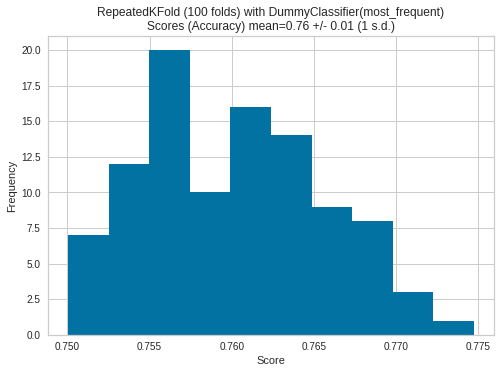

In [21]:
strategy = "most_frequent"
CV_N_REPEATS=20
BINS=10
scores = cross_val_score(dum,X, y, 
                         cv=RepeatedKFold(n_repeats=CV_N_REPEATS), 
                         scoring=None) 
scores_dummy = scores.copy()

score_line = "Scores (Accuracy) mean={0:.2f} +/- {1:.2f} (1 s.d.)".format(scores.mean(),scores.std())
plt.figure(figsize=(7,7))
fig, ax = plt.subplots()
pd.Series(scores).hist(ax=ax, bins=BINS)
ax.set_title(f"RepeatedKFold ({len(scores)} folds) with DummyClassifier({strategy})\n" + score_line);
ax.set_xlabel("Score")
ax.set_ylabel("Frequency")

In [22]:
def plot_tree_graph(model,columns,class_names):
    #This function plots the constructed decision tree
    dot_data = export_graphviz(model,feature_names=columns,class_names=class_names) 
    graph = graphviz.Source(dot_data) 
    return graph


def confusion_mat(y_pred,y_test):
    plt.figure()
    sns.set(font_scale=1.5)
    cm = confusion_matrix(y_pred, y_test)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

Accuracy mean=0.50 +/- 0.02 (1 s.d.)
0.3533711606597014


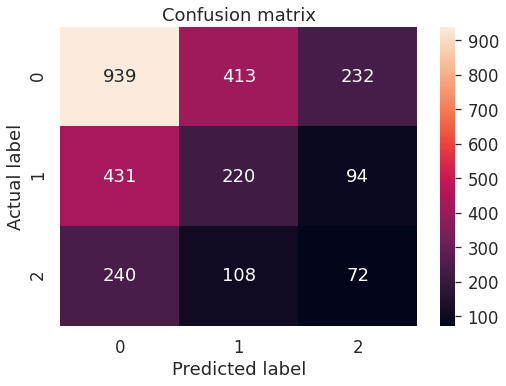

In [59]:
knn=KNeighborsClassifier(n_neighbors=3,n_jobs=10,p=2) 
knn.fit(x_ros,y_ros)

scores = cross_val_score(knn, X_val, y_val, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
print(f"Accuracy mean={scores.mean():0.2f} +/- {scores.std():0.2f} (1 s.d.)")
y_pred_1 = knn.predict(X_val)
print(f1_score(y_val,y_pred_1,average='macro'))
confusion_mat(y_pred_1,y_val)

In [40]:
for depth in [n for n in range(10,21,1)]:
  dt=DecisionTreeClassifier(random_state=1, max_depth=depth)
  dt=dt.fit(x_ros,y_ros)
  dt_scores = cross_val_score(dt, X_val, y_val, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
  y_pred_dt = dt.predict(X_val)
  print(depth,f"Accuracy mean={dt_scores.mean():0.2f} +/- {dt_scores.std():0.2f} (1 s.d.)",f1_score(y_val,y_pred_dt,average='macro'))

10 Accuracy mean=0.52 +/- 0.02 (1 s.d.) 0.28422487044378464
11 Accuracy mean=0.50 +/- 0.02 (1 s.d.) 0.30577988838020304
12 Accuracy mean=0.49 +/- 0.02 (1 s.d.) 0.3217069167572255
13 Accuracy mean=0.47 +/- 0.02 (1 s.d.) 0.32969594257243895
14 Accuracy mean=0.46 +/- 0.02 (1 s.d.) 0.33055658807803645
15 Accuracy mean=0.45 +/- 0.02 (1 s.d.) 0.3362677760339523
16 Accuracy mean=0.45 +/- 0.02 (1 s.d.) 0.33415724718785417
17 Accuracy mean=0.45 +/- 0.02 (1 s.d.) 0.3261655108241443
18 Accuracy mean=0.44 +/- 0.02 (1 s.d.) 0.3272718517428033
19 Accuracy mean=0.43 +/- 0.02 (1 s.d.) 0.33161589247698786
20 Accuracy mean=0.43 +/- 0.02 (1 s.d.) 0.32536872910551534


In [54]:
dt=DecisionTreeClassifier(random_state=1, max_depth=15)
dt=dt.fit(x_ros,y_ros)
dt_scores = cross_val_score(dt, X_val, y_val, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
y_pred_dt = dt.predict(X_val)
print(depth,f"Accuracy mean={dt_scores.mean():0.2f} +/- {dt_scores.std():0.2f} (1 s.d.)",f1_score(y_val,y_pred_dt,average='macro'))

34 Accuracy mean=0.46 +/- 0.02 (1 s.d.) 0.3362677760339523


In [ ]:
y_pred_dt2 = dt.predict(X_val)

In [ ]:
f1_score(y_val,y_pred_dt2,average='macro')

0.35677223030936117

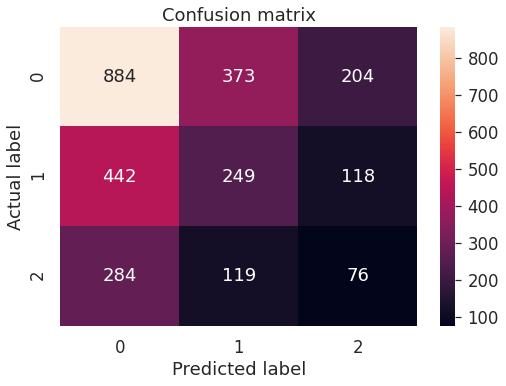

In [ ]:
confusion_mat(y_pred_dt2, y_val)

In [ ]:
plt.figure()
graph=plot_tree_graph(dt,X.columns,class_names=['1','2','3'])

<Figure size 432x288 with 0 Axes>

In [43]:
bag=BaggingClassifier(n_estimators=20,oob_score=True,max_samples=10,max_features=10) 
bag=bag.fit(x_ros,y_ros)

bag_scores = cross_val_score(bag, X_val, y_val, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
print("Accuracy mean={0:0.2f} +/- {1:0.2f} (1 s.d.)".format(scores.mean(),scores.std()))
print("Out of bag score: {0:0.2f}".format(bag.oob_score_*100) );

Accuracy mean=0.51 +/- 0.01 (1 s.d.)
Out of bag score: 34.59


In [ ]:
from sklearn.metrics import roc_auc_score

In [52]:
sample_leaf_options = [10,20,30,25,35,40]

for leaf_size in sample_leaf_options :
    modelrf = RandomForestClassifier(n_estimators = 200, n_jobs = -1,random_state =50, min_samples_leaf = leaf_size)
    modelrf.fit(x_ros,y_ros)
    print("\n Leaf size :", leaf_size)
    print ("AUC - ROC : ", accuracy_score(y_val,modelrf.predict(X_val)))
    print(f1_score(y_val,modelrf.predict(X_val),average='macro'))


 Leaf size : 10
AUC - ROC :  0.46234994543470354
0.3352013539846263

 Leaf size : 20
AUC - ROC :  0.4172426336849763
0.3422119646653254

 Leaf size : 30
AUC - ROC :  0.3903237540923972
0.33906769978911333

 Leaf size : 25
AUC - ROC :  0.39141506002182613
0.3285954868257159

 Leaf size : 35
AUC - ROC :  0.38050200072753726
0.33225903630458836

 Leaf size : 40
AUC - ROC :  0.3826846125863951
0.3375958357592515


In [51]:
feature_names=X.columns.values
show_weights(modelrf,feature_names=feature_names)

Weight,Feature
0.1291 ± 0.0207,booked_before_n_days
0.1095 ± 0.0211,Room_Rate
0.0984 ± 0.0190,Age
0.0784 ± 0.0133,Meal_Type
0.0752 ± 0.0199,Expected_checkin_Month
0.0507 ± 0.0161,Discount_Rate
0.0387 ± 0.0138,Income
0.0381 ± 0.0133,Ethnicity
0.0370 ± 0.0120,Country_region
0.0365 ± 0.0132,Adults


20
0.5150963986904329
0.3125539470558259


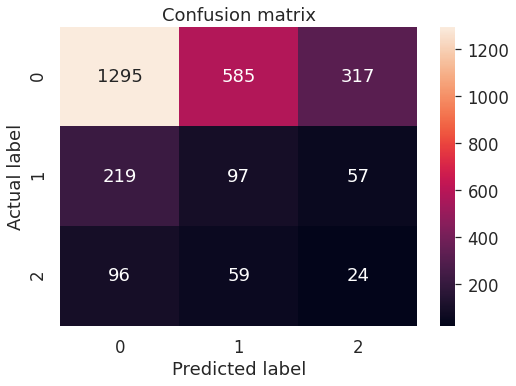

In [24]:
modelgb = GradientBoostingClassifier(n_estimators=100,max_depth=32)
modelgb.fit(x_ros,y_ros)
print(depth)
print(accuracy_score(y_val,modelgb.predict(X_val)))
print(f1_score(y_val,modelgb.predict(X_val),average='macro'))
confusion_mat(modelgb.predict(X_val),y_val)

In [ ]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
import tensorflow as tf

In [ ]:
Reservation_Status_checkIn = list(train_df_bkp[train_df_bkp['Reservation_Status']=='Check-In'].index)

In [ ]:
len(Reservation_Status_checkIn)

19704

In [ ]:
import random

In [ ]:
filtered_idx = random.sample(Reservation_Status_checkIn,6000)

In [ ]:
train_sliced = train_df_bkp.loc[filtered_idx]

In [ ]:
no_show = train_df_bkp[train_df_bkp['Reservation_Status']=='No-Show']

In [ ]:
canceled = train_df_bkp[train_df_bkp['Reservation_Status']=='Canceled']

In [ ]:
new_train = pd.concat([train_sliced, no_show, canceled])

In [ ]:
new_train

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
7947,87484368,0.0,0.980769,0.000000,0.666667,0.333333,0.000000,1.0,0.00,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.0,Check-In,0.0,0.125,0.806667,0.5,0.545455,0.000000,0.282511,0.0
12353,33520896,0.0,0.192308,0.333333,0.666667,0.000000,1.000000,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,Check-In,1.0,0.000,0.280000,0.5,0.545455,0.666667,0.264574,0.0
11477,24016574,1.0,0.730769,1.000000,0.000000,1.000000,1.000000,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,Check-In,0.0,0.500,0.840000,1.0,0.000000,0.000000,0.484305,0.0
498,15332089,0.0,0.980769,0.666667,0.333333,0.000000,0.000000,0.5,0.50,0.0,0.0,0.0,0.0,0.0,0.5,0.5,1.0,Check-In,0.0,0.625,0.080000,0.0,0.545455,0.666667,0.031390,0.0
11156,50370289,0.0,0.750000,0.000000,1.000000,0.666667,0.000000,0.5,1.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Check-In,0.0,0.125,0.426667,1.0,0.272727,0.666667,0.677130,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27485,90330400,1.0,0.115385,1.000000,0.666667,0.333333,0.000000,1.0,0.50,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Canceled,1.0,0.000,0.373333,0.5,0.636364,0.333333,0.147982,0.0
27486,15470478,1.0,0.500000,0.333333,0.666667,0.000000,1.000000,0.0,0.25,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,Canceled,0.0,0.250,0.160000,0.5,0.636364,0.000000,0.789238,0.0
27491,75845782,0.0,0.326923,0.333333,0.666667,1.000000,0.333333,0.5,0.25,0.5,0.5,0.0,0.0,0.0,1.0,0.0,1.0,Canceled,0.0,0.250,0.393333,0.5,0.636364,0.000000,0.040359,0.0
27493,88643756,1.0,0.865385,0.000000,0.000000,0.333333,0.333333,0.5,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Canceled,1.0,0.000,0.880000,0.5,0.636364,0.000000,0.237668,0.0


In [ ]:
new_train.to_csv('train_slised.csv')

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Create param grid.   
param_rf=[{'n_estimators' : list(range(10,150,15)),
            'max_features' : list(range(6,32,5)),
            'max_depth' : list(range(2,36,2)),
           'min_samples_split':list(range(1,6,1)),
           'min_samples_leaf':list(range(1,6,1)), 
           'min_weight_fraction_leaf':list(range(0,5,1))
            }]
# Create grid search object
clfrfgs = RandomizedSearchCV(RandomForestClassifier(oob_score=True), param_distributions = param_rf, n_iter=50, cv = 5, refit=True,verbose=1, n_jobs=-1)
# Fit on data
best_clf = clfrfgs.fit(x_ros, y_ros)
print(best_clf.best_params_)
best_clf.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 247 out of 250 | elapsed:  2.6min remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.7min finished


{'n_estimators': 25, 'min_weight_fraction_leaf': 0, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 11, 'max_depth': 24}


0.880563876874876

In [62]:
print(f1_score(y_val,best_clf.predict(X_val),average='macro'))

0.2764997304995424


In [ ]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]
X_val.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_val.columns.values]
# X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [ ]:
from xgboost import XGBClassifier, plot_importance,to_graphviz

# fit model on training data
param = {'max_depth': 20, 'eta': 0.8,"tree_method":"gpu_hist", 'subsample':1,'learning_rate':0.01, 'n_estimators':1000,'reg_lambda':0.1}
xgb = XGBClassifier(**param)
xgb.fit(x_ros, y_ros)
y_pred = xgb.predict(X_val)

# evaluate predictions
xgb_score = accuracy_score(y_val, y_pred)
print("Accuracy of XGB Classifier: {0:0.2f}".format(xgb_score * 100.0));

#Plot the confusion matrix
confusion_mat(y_pred, y_val)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='multi:softmax',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fals

In [ ]:
gsearch1.cv_results_

{'mean_fit_time': array([ 8.39844747,  8.54203639,  8.49334092, 15.14734159, 14.86953421,
        14.79892206, 24.04347501, 23.22136726, 22.68376746, 34.89488144,
        33.05191007, 26.47944875]),
 'mean_score_time': array([0.10189571, 0.07393289, 0.09418178, 0.12909522, 0.13722134,
        0.13777485, 0.1847888 , 0.20366883, 0.18431067, 0.28268566,
        0.27234874, 0.19685125]),
 'mean_test_score': array([0.39963987, 0.39816704, 0.39800354, 0.39366662, 0.39546705,
        0.3919484 , 0.39039357, 0.39243906, 0.3908843 , 0.3911299 ,
        0.39219356, 0.38793905]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
              mask=[False, False, False, False, False, False, False, False,
           

In [ ]:
gsearch1.best_score_

0.3996398675944427

In [ ]:
gsearch1.best_params_

{'max_depth': 3, 'min_child_weight': 1}

In [ ]:
param_test2 = {
 'max_depth':[3,5,7,9],
 'min_child_weight':[1,3,5]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test2,n_jobs=4,iid=False, cv=5)
gsearch2.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='multi:softmax',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [1, 3, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
     

In [ ]:
gsearch2.best_params_

{'max_depth': 3, 'min_child_weight': 1}

In [ ]:
gsearch2.best_score_

0.3996398675944427

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=27), 
param_grid = param_test3,n_jobs=4,iid=False, cv=5)
gsearch3.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='multi:softmax',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gsearch3.best_score_

0.40070366391212237

In [ ]:
gsearch3.best_params_

{'gamma': 0.2}

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,min_child_weight=1, gamma=0.2, subsample=0.8, colsample_bytree=0.8,objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=27), 
param_grid = param_test4,n_jobs=4,iid=False, cv=5)
gsearch4.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0.2,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='multi:softmax',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_tra

In [ ]:
gsearch4.best_score_

0.4036496540921551

In [ ]:
gsearch4.best_params_

{'colsample_bytree': 0.6, 'subsample': 0.7}

In [ ]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=3,
 min_child_weight=1, gamma=0.3, subsample=0.6, colsample_bytree=0.7,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5,n_jobs=4,iid=False, cv=5)
gsearch5.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.7, gamma=0.3,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=177, n_jobs=1,
                                     nthread=4, objective='multi:softmax',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.6, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gsearch5.best_score_

0.42034202537661614

In [ ]:
gsearch5.best_params_

{'reg_alpha': 100}

In [ ]:
param_test6 = {
 'learning_rate':[0.1, 0.01, 0.05, 0.02]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=3,
 min_child_weight=1, gamma=0.2, subsample=0.6, colsample_bytree=0.7,reg_alpha=100,objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6,n_jobs=4,iid=False, cv=5)
gsearch6.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.7, gamma=0.2,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=177, n_jobs=1,
                                     nthread=4, objective='multi:softmax',
                                     random_state=0, reg_alpha=100,
                                     reg_lambda=1, scale_pos_weight=1, seed=27,
                                     silent=None, subsample=0.6, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.01, 0.05, 0.02]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gsearch6.best_score_

0.46027317850317456

In [ ]:
gsearch6.best_params_

{'learning_rate': 0.01}

In [ ]:
gb_final = XGBClassifier( learning_rate =0.01,
                         n_estimators=1000,
                         max_depth=3,
                         min_child_weight=1,
                         gamma=0.2,
                         subsample=0.6,
                         colsample_bytree=0.7,
                         reg_alpha=0.1, 
                         tree_method = "gpu_hist",
                         nthread=4, 
                         scale_pos_weight=1,
                         seed=27).fit(X,y)

In [ ]:
f1_score(y_val,xgb.predict(X_val),average='macro')

0.331473147234435

In [ ]:
f1_score(y_val,gb_final.predict(X_val),average='macro')

0.31104735805586203

In [ ]:
# gb_final.predict(X_test)

In [ ]:
# f1_score(y_val,y_pred,average='macro')

In [ ]:
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

The ensembled model with all the 3 classifiers is: 0.5754819934521644


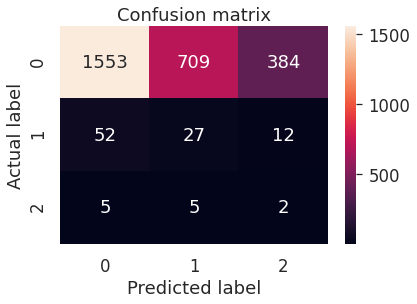

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_knn_rf_xgb=VotingClassifier(estimators= [('bag',bag),('Random Forest', dt)], voting='hard')
ensemble_knn_rf_xgb.fit(X,y)

#compute accuracy
print('The ensembled model with all the 3 classifiers is:',ensemble_knn_rf_xgb.score(X_val,y_val))

#make predictions
y_pred = ensemble_knn_rf_xgb.predict(X_val)
#Plot the confusion matrix
confusion_mat(y_pred, y_val)

In [ ]:
from sklearn.metrics import f1_score

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
f1_score(y_val, ensemble_knn_rf_xgb.predict(X_val),average='macro')

0.2681510589325095

The best model so far is DT

In [ ]:
dt.score(X_val,y_val)

0.43979628955983996

In [ ]:
print(classification_report(y_val,dt.predict(X_val)))

              precision    recall  f1-score   support

           1       0.61      0.55      0.58      1610
           2       0.31      0.34      0.32       741
           3       0.16      0.19      0.17       398

    accuracy                           0.44      2749
   macro avg       0.36      0.36      0.36      2749
weighted avg       0.46      0.44      0.45      2749



In [ ]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=28, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
import pickle

In [ ]:
pickle.dump(dt, open('dt_with_36_f1_score', 'wb'))

In [ ]:
dt_with_36_f1_score = pickle.load(open('/content/dt_with_36_f1_score', 'rb'))

In [ ]:
dt_with_36_f1_score.predict(X_val)

array([2, 2, 3, ..., 2, 2, 1])

In [ ]:
test = pd.read_csv('/content/test_cleaned_scaled.csv')

In [ ]:
test.head()

,Unnamed: 0,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
0,0,62931593,0.0,0.653846,0.000000,0.000000,1.0,0.666667,0.0,0.50,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.250,0.353333,0.0,0.909091,0.000000,0.110619,1.0
1,1,70586099,0.0,0.557692,0.000000,0.000000,1.0,0.333333,0.5,0.25,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,1.0,0.000,0.733333,0.0,0.909091,0.000000,0.477876,1.0
2,2,4230648,0.0,0.192308,1.000000,0.000000,0.0,0.333333,0.0,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0.125,0.113333,1.0,0.272727,0.666667,0.106195,1.0
3,3,25192322,0.0,0.903846,0.333333,1.000000,1.0,0.666667,0.5,0.00,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.250,0.046667,0.0,0.909091,0.333333,0.823009,1.0
4,4,80931528,1.0,0.519231,0.666667,0.666667,1.0,0.666667,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.5,0.5,1.0,1.0,0.000,0.126667,0.0,0.909091,0.333333,0.097345,1.0


In [ ]:
dt.n_features_

25

In [ ]:
X.columns

Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Adults', 'Children',
       'Babies', 'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate', 'Expected_checkin_Year',
       'Expected_checkin_Month', 'expected_days_of_checkin',
       'booked_before_n_days', 'isWeekend_trip'],
      dtype='object')

In [ ]:
test = pd.read_csv('/content/test_cleaned_scaled.csv')

In [ ]:
test.head()

,Unnamed: 0,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
0,0,62931593,0.0,0.653846,0.000000,0.000000,1.0,0.666667,0.0,0.50,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.250,0.353333,0.0,0.909091,0.000000,0.110619,1.0
1,1,70586099,0.0,0.557692,0.000000,0.000000,1.0,0.333333,0.5,0.25,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,1.0,0.000,0.733333,0.0,0.909091,0.000000,0.477876,1.0
2,2,4230648,0.0,0.192308,1.000000,0.000000,0.0,0.333333,0.0,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0.125,0.113333,1.0,0.272727,0.666667,0.106195,1.0
3,3,25192322,0.0,0.903846,0.333333,1.000000,1.0,0.666667,0.5,0.00,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.250,0.046667,0.0,0.909091,0.333333,0.823009,1.0
4,4,80931528,1.0,0.519231,0.666667,0.666667,1.0,0.666667,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.5,0.5,1.0,1.0,0.000,0.126667,0.0,0.909091,0.333333,0.097345,1.0


In [ ]:
test = test.drop(['Reservation-id','Unnamed: 0'],1)

In [ ]:
dt_predictions = dt.predict(test)

In [ ]:
pd.DataFrame({"Reservation-id":test['Reservation-id'],"Reservation_Status":dt_predictions}).to_csv('submission3.csv')

# Ensemble Learning



In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train.head()

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days
0,0,40,0,0,0,0,0,2,2,0,0,0,0,0,0,0,Check-In,0,10,218,-1.241242,7,1,41
1,0,49,0,1,1,1,0,3,3,0,0,0,0,1,0,0,Check-In,1,0,185,-1.241242,7,1,36
2,0,42,1,0,0,1,0,3,3,0,0,0,0,0,0,0,Check-In,1,0,119,-1.241242,7,4,3
3,1,25,2,2,2,2,1,4,3,0,0,0,0,1,1,0,Check-In,0,5,144,-1.241242,7,1,12
4,0,62,0,3,3,1,2,1,1,0,0,0,0,0,2,1,Check-In,0,10,242,-1.241242,7,1,13


In [ ]:
train.Expected_checkin_Year = scaler.inverse_transform(train.Expected_checkin_Year)

In [ ]:
train.shape

(25925, 24)

In [ ]:
list(train.columns)

['Gender',
 'Age',
 'Ethnicity',
 'Educational_Level',
 'Income',
 'Country_region',
 'Hotel_Type',
 'Adults',
 'Children',
 'Babies',
 'Meal_Type',
 'Visted_Previously',
 'Previous_Cancellations',
 'Deposit_type',
 'Booking_channel',
 'Required_Car_Parking',
 'Reservation_Status',
 'Use_Promotion',
 'Discount_Rate',
 'Room_Rate',
 'Expected_checkin_Year',
 'Expected_checkin_Month',
 'expected_days_of_checkin',
 'booked_before_n_days']

In [ ]:
list(validation.columns)

['Reservation-id',
 'Gender',
 'Age',
 'Ethnicity',
 'Educational_Level',
 'Income',
 'Country_region',
 'Hotel_Type',
 'Adults',
 'Children',
 'Babies',
 'Meal_Type',
 'Visted_Previously',
 'Previous_Cancellations',
 'Deposit_type',
 'Booking_channel',
 'Required_Car_Parking',
 'Reservation_Status',
 'Use_Promotion',
 'Discount_Rate',
 'Room_Rate',
 'Expected_checkin_Year',
 'Expected_checkin_Month',
 'expected_days_of_checkin',
 'booked_before_n_days',
 'isWeekend_trip']

In [ ]:
validation.shape

(2749, 26)

In [ ]:
train.Expected_checkin_Year = train.Expected_checkin_Year.apply(lambda yr:np.mod(yr,2000))

In [ ]:
validation.Expected_checkin_Year = validation.Expected_checkin_Year.apply(lambda yr:np.mod(yr,2000))

In [ ]:
values_train = train.drop(['Reservation_Status'],1).values

In [ ]:
values_validate = validation.drop(['Reservation_Status','Reservation-id','isWeekend_trip'],1).values

In [ ]:
imputer = SimpleImputer()

In [ ]:
values_validate.shape

(2749, 23)

In [ ]:
values_train.shape

(25925, 23)

In [ ]:
imputedData_train = imputer.fit_transform(values_train)

In [ ]:
imputedData_validation = imputer.fit_transform(values_validate)

In [ ]:
imputedData_train

array([[ 0., 40.,  0., ...,  7.,  1., 41.],
       [ 0., 49.,  0., ...,  7.,  1., 36.],
       [ 0., 42.,  1., ...,  7.,  4.,  3.],
       ...,
       [ 0., 49.,  0., ...,  9.,  1.,  9.],
       [ 1., 65.,  2., ...,  8.,  1., 98.],
       [ 0., 48.,  1., ...,  8.,  1., 65.]])

In [ ]:
imputedData_validation

array([[  1.,  56.,   1., ...,   2., 195.,   0.],
       [  1.,  60.,   0., ...,   4., 175.,   0.],
       [  0.,  58.,   3., ...,   1., 193.,   0.],
       ...,
       [  1.,  18.,   3., ...,   2.,  30.,   1.],
       [  1.,  42.,   3., ...,   1., 170.,   1.],
       [  1.,  53.,   2., ...,   3., 179.,   1.]])

In [ ]:
scaler2 = MinMaxScaler(feature_range=(0, 1))

In [ ]:
normalizedData_train = scaler2.fit_transform(imputedData_train)

In [ ]:
normalizedData_validation = scaler2.fit_transform(imputedData_validation)

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
y_stk = train['Reservation_Status'].map({"Check-In":1,"Canceled":2,"No-Show":3})

In [ ]:
y_stk_val = validation['Reservation_Status'].map({"Check-In":1,"Canceled":2,"No-Show":3})

In [ ]:
y_stk_val = np.array(y_stk_val)

In [ ]:
y_stk = np.array(y_stk)

In [ ]:
X_stk = normalizedData_train

In [ ]:
X_stk_val = normalizedData_validation

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
cart = DecisionTreeClassifier()
num_trees = 200
model_bagg = BaggingClassifier(base_estimator=cart, n_jobs =10,n_estimators=num_trees, random_state=7)
results = model_selection.cross_val_score(model_bagg, X, y, cv=kfold)
print(results.mean())

0.3399635732476149


In [ ]:
model_bagg.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
predicted_bagg= model_bagg.predict(X_val)

In [ ]:
f1_score(y_val,predicted_bagg,average='macro')

0.31616949596859295

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=20, random_state=seed)
model_ada = AdaBoostClassifier(n_estimators=num_trees,learning_rate =0.01, random_state=seed)
results = model_selection.cross_val_score(model_ada, X, y, cv=kfold)
print(results.mean())

0.27622214734229755


In [ ]:
model_ada.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=100, random_state=7)

In [ ]:
predicted_ada = model_ada.predict(X_val)

In [ ]:
f1_score(y_val,predicted_ada,average='macro')

0.2462338456832607

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier(max_depth=30)
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.49091653027823245


In [ ]:
ensemble.fit(X,y)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('cart',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion...
                                        

In [ ]:
X_stk_val

array([[1.        , 0.73076923, 0.33333333, ..., 0.63636364, 0.33333333,
        0.88053097],
       [1.        , 0.80769231, 0.        , ..., 0.63636364, 1.        ,
        0.7920354 ],
       [0.        , 0.76923077, 1.        , ..., 0.72727273, 0.        ,
        0.87168142],
       ...,
       [1.        , 0.        , 1.        , ..., 0.90909091, 0.33333333,
        0.15044248],
       [1.        , 0.46153846, 1.        , ..., 0.90909091, 0.        ,
        0.7699115 ],
       [1.        , 0.67307692, 0.66666667, ..., 0.90909091, 0.66666667,
        0.80973451]])

In [ ]:
predicted_ens = ensemble.predict(X_val)

In [ ]:
ensemble.score(X_val,y_val)

0.5856675154601674

In [ ]:
y_stk_val.shape

(2749,)

In [ ]:
predicted_ens.shape

(2749,)

In [ ]:
f1_score(y_val,predicted_ens,average='macro')

0.2462338456832607

In [ ]:
results

array([1.        , 1.        , 1.        , 1.        , 0.74315465,
       0.58680556, 0.57060185, 0.5632716 , 0.57368827, 0.5625    ])

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
model.score(X_val,y_val)

0.5853037468170244

In [ ]:
f1_score(y_val,model.predict(X_val),average='macro')

0.24699339435409817

In [ ]:
# use mlp for prediction on multi-label classification
from numpy import asarray
from sklearn.datasets import make_multilabel_classification
from keras.models import Sequential
from keras.layers import Dense

def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

n_inputs, n_outputs = X.shape[0], 3
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(np.array(X).reshape(1,-1), np.array(y).reshape(1,-1), verbose=0, epochs=100)

ValueError: ignored

In [ ]:
y.shape

(15221,)